In [2]:
import nltk

# Przygotowanie tekstu do pracy
## Tokenizacja

In [3]:
tweet1= "Want to break into AI? You can learn Deep Learning from new deeplearning.ai courses on Coursera:"
tweet2="Stanford's first day of class--record-breaking 1040 people already enrolled for on-campus Machine Learning (CS229). Wow! @danboneh"

In [4]:
long_text = """TLDR; An overview of current trends for feature learning in the unsupervised way: regress to random targets for manifold learning, exploit causality to characterize visual features, and in reinforcement learning, augment the objective with auxiliary control tasks and pre-train by self-play. There is so much to learn from unlabeled data and it seems that we have only skimmed the surface of it by only using labels.


What’s happening in the space of unsupervised learning in 2017? In this post I will give an overview of recent work, from a very biased, personal pick.

Unsupervised learning is a long lasting challenge in machine learning, perceived as a key ingredient for artificial intelligence — paraphrasing Yann LeCun. There is so much information in unlabeled data and we are not using it at the full extent, while it seems plausible that the human brain is designed to do so without supervision for most of its learning time. Or, in a picture, here you have the now famous LeCake:

LeCake

The fact is, by training machines with many labels, they have a somewhat easier time with respect to how we — animals — may learn. Think about: finding intrinsic regularities; being surprised when those natural patterns are broken and therefore investigate their causes; acting by curiosity; training by playing. Neither of those require explicit supervision about what’s good or bad, in principle. Yes, this is a somewhat arbitrary list, but I made it up to roughly connect with the ideas loosely inspiring the papers I have selected for this post.

The unifying idea here below is finding self supervision in improbable, previously unexplored places of the data. Where should we look for signals when there is no label? Or, how to learn features without any explicit supervision?


Unsupervised learning by predicting the noise [Bojanowski & Joulin ICML17] A striking answer is given in here and that is: from noise. I rank this paper among the very top ones at ICML this year. The idea goes as follows. Sample uniformly random vectors from a hypersphere, in a number that is of the order of the data points. Those are going to be the surrogates for the regression targets. In fact, learning amounts to match images to random vectors, by learning visual features in a deep convolutional net, via the minimization of a loss for supervised learning.

In particular, the training procedure alternate between gradient descent over the network parameters and a re-assignment of pseudo-targets to different images, again in order to minimize the loss function. Here the result on visual features from ImageNet; they are both results of training an AlexNet on ImageNet, on the left with the targets, on the right with proposed unsupervised method.

This approach appears to be state of the art in the cases of transfer learning explored in the paper. But why should it work at all? My interpretation: the net is learning a new space of representation that is good for describing a metric on the hypersphere. This is a sort of implicit manifold learning. Optimizing by shuffling the assignment is probably crucial since a bad match would not allow similar images to be mapped close to each other in the new representation. Moreover, the network must act as an information bottleneck, as usual. Otherwise, in the limit of infinite capacity the model would simply learn an uninformative 1-to-1 image to noise map. (Thank to Mevlana for stressing this point.)

The promising results from this seriously counterintuitive idea – I mean, the authors wanted to convey so, see the title – is basically reiterating the argument that you should not need labels to find out about patterns in your data, even when the objective is building complex visual features.

See also [Bojanowski et al. arXiv17].


Discovering causal signals in images [Lopez-Paz et al. CVPR17] I found out about the next from a provocative and inspiring talk by Léon Bottou titled Looking for the missing signal (yes, I stole the title from there). The second half of it is about their WGAN; the relevant bit here is about causality. But before talking about it, let’s step back for a minute to see how causality may be relevant for our discussion.

If you learn about causality from a machine learning background, you quickly come to the conclusion that the whole field is missing something rather important at its foundation. We have created a whole industry of methods that learn to associate and to predict things just looking at their correlation in the training data. That won’t do the job in many scenarios. What if we were able to learn models that can take into account causality in their decisions? Basically, can we stop our convolutional network telling us that the animal in the picture is a lion because the background shows the typical Savanna?

Many are working towards the idea. This paper in particular aims to verify experimentally “that the higher-order statistics of image datasets can inform about causal relations”. More precisely, the authors conjecture that Object features and anticausal features are closely related and vice-versa context features and causal features are not necessarily related. Context features give the background while object features are what it would be usually inside bounding boxes in an image dataset; respectively, the Savanna and the lion’s mane.

Independently, “causal features are those that cause the presence of the object of interest in the image (that is, those features that cause the object’s class label), while anticausal features are those caused by the presence of the object in the image (that is, those features caused by the class label).” Respectively, in our examples a causal feature would be indeed the Savanna’s visual patterns and an anticausal feature would be the lion’s mane.

How did they go about the experiments? My short summary won’t do justice, but I will try. First, we need to train a detector for causal direction. The idea is based on much previous work that demonstrated that “additive causal model” may leave a statistical footprint in observational data about the direction of causality, which in turn can be detected by studying high order moments. (If this sounds all new, I recommend to go through the references of the paper.) The idea is to learn how to capture this statistical trace by a neural network, which is tasked to distinguish between causal/anticausal, i.e. to perform binary classification.

The only feasible way to train such network is by having ground truth label about causality. Not many of those datasets are around. But, the fact is, such data can be easily synthetized, by sampling causes-effect pair of variables and a labels indicating the direction. No image data is used so far.

Second, two version of the images, with either object or context blanked-out, are featurized by a standard deep residual network. Some object and context scores are designed on top of those features as signal to whether the image is likely to be either about an object or its context.

We can now associate object and context with their causal or anticausal role in the image. It results that, for example, “the features with the highest anticausal score exhibit a higher object score than the features with the highest causal score.”

By proving experimentally the conjecture, this work implies that causality in images is in fact related to the difference between objects and their contexts. The result has the promise of opening new research avenues, as better algorithms for causal direction should, in principle, help learning features that generalize better when the data distribution changes. Causality should help with building more robust features by awareness of the generating process of the data.

See also [Peters et al. JRSS15], [Louizos et al. NIPS17].


Reinforcement learning with unsupervised auxiliary tasks [Jaderberg et al. ICLR17] This paper may be considered a bit old by current standards since it has already 60 citations at the time I am writing — it was on the arXiv from November `16! There is in fact some newer work that already builds on the idea. But in fact I have picked it exactly because of its fundamentally novel insight, instead of discussing more sophisticated methods based on it.

The scenario is reinforcement learning. A major difficulty in training an agent with reinforcement learning is the sparsity/delay of the rewards. So why not augmenting the training signal by introducing auxiliary tasks? Of course the catch is that the pseudo-reward must be both related to the real objective and engineered without resorting to human supervision.

The proposal of the paper is straightforward and practical: augment the objective function (the reward to maximize) with a sum of performance over auxiliary tasks. The policy has to be learned to do well in the sense of this overall performance. In practice, there are going to be models approximating both the main policy and other policies for accomplishing the additional tasks; those model shares some of their parameters, e.g. the bottom layers can be learned jointly to model raw visual features. “The agent must balance improving its performance with respect to the global reward with improving performance on the auxiliary tasks.”

The kind of auxiliary tasks explored in the paper are the following. First, pixel control. The agent learns a separate policy to maximally change the pixels grids over the input image. The rationale is that “changes in the perceptual stream often correspond to important events in an environment”, hence learning to control changes should be beneficial. Second, feature control. The agent is trained to predict the activation values of hidden units in some intermediate layers of the policy/value network. This idea is interesting “since the policy or value networks of an agent learn to extract task-relevant high-level features of the environment”. Third, reward prediction. The agent learns to predict immediate future rewards. The three auxiliary tasks are learned via experience replay from a buffer of previous experience of the agent.

Cutting short on other details, the whole method is called UNREAL. It is shown to learn faster and better policies on Atari games and Labyrint.

A final insight in the paper is on the effectiveness of doing pixel control instead of simply predicting pixels with a reconstruction loss or the pixel input changes. They can all be seen as form of visual self-supervision, but at different level of abstraction. “Learning to reconstruct only led to faster initial learning and actually made the final scores worse. Our hypothesis is that input reconstruction hurts final performance because it puts too much focus on reconstructing irrelevant parts of the visual input instead of visual cues for rewards”.


Intrinsic motivation and automatic curricula via asymmetric self-play [Sukhbaatar et al. arXiv17] The last paper I want to highlight is related to the idea above of auxiliary tasks in reinforcement learning. But, crucially, instead of tweaking the objective function explicitly, the agent is trained to accomplish complete self-plays, simpler tasks that can be generated automatically — to certain extent.

An initial phase of self-playing is set up by splitting the agent into “two separate minds”, Alice and Bob. The authors propose self-playing under the assumption that the environment has to be (nearly) reversible or resettable to the initial state. In this case, Alice executes a task and asks Bob to do the same, by reaching the same observable state of the world where Alice ended up. For example, Alice could move to pick up a key, open a door, turn off the light and the stop in a certain place; Bob must follow the same list of actions and stop at the same place. Finally, you can imagine that the original tasks for this simple environment is to catch a flag in the room with the light on:

Those tasks are devised by Alice to force Bob to learn interacting with the environment. Alice and Bob have their distinct rewards functions. Bob has to minimize the time for completion, while Alice is rewarded when Bob takes more time, while being able to achieve the goal. The interplay between these policies allow them to “automatically construct a curriculum of exploration”. Once again, this is another realization of the idea of self-supervision for feature learning.

They tested the idea on a few environments and on a version of StarCraft without enemies to fight. “The target task is to build Marine units. To do this, an agent must follow a specific sequence of operations: (i) mine minerals with workers; (ii) having accumulated sufficient mineral supply, build a barracks and (iii) once the barracks are complete, train Marine units out of it. Optionally, an agent can train a new worker for faster mining, or build a supply depot to accommodate more units. […] After 200 steps, the agent gets rewarded +1 for each Marine it has built.”

“Since exactly matching the game state is almost impossible, Bob’s success is only based on the global state of the game, which includes the number of units of each type (including buildings), and accumulated mineral resource. So Bob’s objective in self-play is to make as many units and mineral as Alice in shortest possible time”. In this scenario, self-play really helps to speed up learning with REINFORCE and does better at convergence with respect to REINFORCE + a simpler baseline method for policy pre-training:

Notice althought that the plot does not take into account the time spent in pre-training the policy.

See also [Matiisen et al. arXiv17].


On a final note, it isn’t just that just unsupervised learning is hard, but measuring its performance is even harder… In Yoshua Bengio’s words : “We don’t know what is a good representation. […] We don’t have a good definition of what is the right objective function to even measure that a system is doing a good job on unsupervised learning.”

In fact, virtually all work on unsupervised features learning indirectly uses supervised or reinforcement learning for measuring how useful those features can be. This is OK when unsupervised learning is performed precisely with the intent of improving and speeding up training for predictive models or agents. Yet, the story is different when instead we are after a general representation of, say, videos or texts that should generalize to unseen data distributions “of the same kind”, which is broadly the idea of robust features for transfer learning.


Huge thanks for discussions and feedback to Frank Nielsen, Mevlana Gemici, Marcello Carioni, Richard Nock, Hamish Ivey-Law, Wilko Henecka, Zeynep Akata and Veronika Cheplygina.
References

    [Bojanowski & Joulin ICML17] Piotr Bojanowski and Armand Joulin, Unsupervised learning by predicting the noise, ICML17

    [Bojanowski et al. arXiv17] Piotr Bojanowski, Armand Joulin, David Lopez-Paz and Arthur Szlam, Optimizing the latent space of generative networks, arXiv17

    [Jaderberg et al. ICLR17] Max Jaderberg, Volodymyr Mnih, Wojciech Marian Czarnecki, Tom Schaul, Joel Z Leibo, David Silver and Koray Kavukcuoglu, Reinforcement learning with unsupervised auxiliary tasks, ICLR17
"""

(**Ćwiczenie**) Porównaj pracę 2 tokenizatorów z nltk
- Czy dają różne wyniki?
- Czy te różnice mogą zostać uzasadnione? Spróbuj je uzasadnić.

In [15]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

twitter_tokens = TweetTokenizer().tokenize(tweet2)
word_tokens = word_tokenize(tweet2)
print(twitter_tokens)
print(word_tokens)

["Stanford's", 'first', 'day', 'of', 'class--record-breaking', '1040', 'people', 'already', 'enrolled', 'for', 'on-campus', 'Machine', 'Learning', '(', 'CS229', ')', '.', 'Wow', '!', '@danboneh']
['Stanford', "'s", 'first', 'day', 'of', 'class', '--', 'record-breaking', '1040', 'people', 'already', 'enrolled', 'for', 'on-campus', 'Machine', 'Learning', '(', 'CS229', ')', '.', 'Wow', '!', '@', 'danboneh']


(**Ćwiczenie**) Przeprowadź to samo ćwiczenie, ale dla tekstu w języku polskim.
- Czy tokenizator w języku polskim daje tak samo sensowne wyniki, co w języku angielskim? Czy nadal da się uzasadnić wszystkie różnice?

In [6]:
p1 = "Szukam jakichś pozytywów wynikających z popularności teorii Wielkiej Lechii."
p2 = """Połowa źródeł o Wielkiej Lechii pochodzi z Internetu. O fenomenie „turbosłowianizmu” [ROZMOWA]
Krzysztof Chmieliński, Roman Żuchowicz | 05-10-2017 11:20:14 | 24 min zajmie Ci przeczytanie tego artykułu
Połowa źródeł o Wielkiej Lechii pochodzi z Internetu. O fenomenie „turbosłowianizmu” [ROZMOWA]
Rafał Gawlikowski

Romantyczna słowianofilia, komunistyczna potrzeba udowodnienia, że polska państwowość sięga dalej niż chrzest Mieszka, odrodzenie okultyzmu na Wschodzie, w chwili rozpadu Związku Sowieckiego. Co łączy te zjawiska? Wspólnie stworzyły one podglebie, na którym pseudonaukowcy mogą dziś budować mit „turbosłowian”. Z Romanem Żuchowiczem rozmawia Krzysztof Chmieliński.

Przygotowujesz książkę o zjawisku znanym w internecie jako „turbosłowianizm”. Co to za fenomen i z jakiej perspektywy zamierzasz go opisywać?

To bardzo złożona subkultura, koncentrująca się wokół pseudonaukowych opowieści o najdawniejszej historii Polaków. Ja zająłem się jednym z jej wariantów: Wielką Lechią. Najpełniej opowieść ta została wyrażona w książce Słowiańscy królowie Lechii, napisanej przez Janusza Bieszka i wydanej w 2015 r. przez wydawnictwo Bellona. Zgodnie z tą wizją historia Polski nie zaczyna się od Mieszka I czy jego bezpośrednich poprzedników. W odległej starożytności, w pierwszej połowie drugiego tysiąclecia przed naszą erą, miało powstać w Europie Środkowej potężne państwo nazywane Wielką Lechią. Jego terytorium było tak rozległe, że graniczyło nie tylko z państwem Aleksandra Macedońskiego, a później z Cesarstwem Rzymskim, ale również ze starożytnymi imperiami irańskimi. Za serce tej cywilizacji uznał Bieszk obszar dzisiejszej Polski. Imperium Lechitów miało być państwem „Ariów-Słowian”, którzy opisywani są w tej opowieści jako bezpośredni przodkowie współczesnych Polaków. Kres długiej historii Wielkiej Lechii miał położyć spisek niemiecko-watykański, w efekcie którego wymazano również z kart historii wszelki (niemal) ślad jej istnienia. Po wiekach znaleźli się jednak ludzie tacy jak Janusz Bieszk, którzy zdołali „odsłonić” ukrywaną przez setki lat „prawdę”. Książka okazała się ogromnym sukcesem wydawniczym.

Są jakiekolwiek historyczne tropy pozytywnie weryfikujące istnienie tych „Ariów-Słowian”?

Posługując się warsztatem historyka i archeologa, nie tylko nie można twierdzenia o istnieniu Wielkiej Lechii udowodnić, ale można wręcz je bezspornie obalić. Rozmawiając na ten temat, nie poruszamy się więc w sferze jakichś kontrowersji w świecie nauki akademickiej. Bieszk opiera się bezkrytycznie na wizjach przedstawionych w różnych źródłach średniowiecznych, odwołując się zresztą nie tylko do autentycznych dokumentów tej epoki, ale wykorzystując też szeroko treści zaczerpnięte ze znanych falsyfikatów, takich jak tzw. „Kronika Prokosza”. Zawłaszcza dla Lechii historię rozmaitych starożytnych plemion, m.in. germańskich i sarmackich, których niesłowiański charakter łatwo udowodnić. Poza tym podpiera się poglądami naukowymi, które bywały dyskutowane w XIX w., a które od dawna są odrzucone. Próbuje podpierać się także językoznawstwem, archeologią i genetyką, z mizernym zresztą skutkiem. Jego książka ma bibliografię i naśladuje wywód naukowy, ale to tylko mimikra. Mamy w tym wypadku do czynienia z teorią pseudonaukową.

Jaka jest geneza tej historii? Czy mówimy o ściśle współczesnym zjawisku, czy ta opowieść jest osadzona w jakiejś dłuższej tradycji?

Moim zdaniem zjawisko tego tak zwanego „turbosłowiaństwa” można wywieść z dawnych wzorów historiograficznych. Zanim historia wypracowała zestaw metod, które zasługiwały na miano naukowych, usiłowano rekonstruować najdawniejszą przeszłość na inne sposoby. Uczeni w średniowieczu chwytali się w tym celu np. wywodów etymologicznych, a także rozmaitych – często bardzo dowolnych – skojarzeń z wątkami z literatury starożytnej czy Biblii. Można powiedzieć, że chcąc opowiedzieć spójną historię, luki w wiedzy uzupełniali zmyśleniem.  Ponieważ współcześnie lepiej znamy mentalność ludzi średniowiecza, to opowieści o wyprawie Aleksandra Wielkiego na Polskę nie budzą już naszego śmiechu. Nie wykorzystujemy ich do rekonstruowania przeszłości, ale doceniamy wykształcenie autorów i rozumiemy potrzebę „wynajdowania” tego rodzaju tradycji. Zrąb metod racjonalnej, krytycznej historiografii narodził się w okresie renesansu. Jednak historia była i jest uzależniona od rozwoju innych nauk. Archeologia rozwijała się prężnie w XIX w., podobnie językoznawstwo porównawcze. Dopiero wówczas historycy stracili możliwość np. swobodnego budowania argumentów na bazie tzw. ludowej etymologii. Te zmiany zachodziły stopniowo i jeszcze w XIX w. różne, z naszego punktu widzenia dziwne, koncepcje bywały serio dyskutowane w kręgach naukowych.

Wiek XIX  jest w ogóle ważny dla naszej dyskusji. To czas, w którym romantyzm przynosi ze sobą nową, żywą fascynację słowiańską tożsamością Polaków. Należy też pamiętać, że mówimy o czasach zaborów. Część ówczesnych uczonych czuła się zobligowana do uwznioślania dziejów Polski czy – szerzej – Słowiańszczyzny. Na fali zainteresowania naszymi słowiańskimi korzeniami i najwcześniejszą historią pojawiają się wywody argumentujące za tezą o dawnym imperium Lechitów. Warto w tym miejscu przywołać postacie takie jak Tadeusz Wolański czy Ignacy Pietraszewski. Niektóre z koncepcji formułowanych w tym pionierskim okresie mieściły się jeszcze w obrębie ówczesnej nauki, część zaś już wówczas odrzucano jako błędne. Wraz z rozwojem nauki granica tego, co naukowe stawała się coraz wyraźniejsza. Teorie, które wypadały poza nawias nauki, nie zawsze jednak ginęły. Jeśli z różnych powodów były atrakcyjne dla odbiorców, zaczynały żyć swoim własnym życiem w środowiskach laików-entuzjastów. Na przełomie wieków XIX i XX powstawały różne ruchy okultystyczne i neopogańskie, które nieraz skwapliwie wykorzystywały wątki pseudohistoryczne dla swoich celów. „Turbosłowianie” są więc z nami od dawna. Dokonała się jednak istotna zmiana. W przeszłości postacie czy środowiska wyznające takie teorie działały w oderwaniu od siebie, czasami wprost w podziemiu. Nie utrzymywały ze sobą stałych kontaktów i często w ogóle nie wiedziały wzajemnie o swoim istnieniu, a już na pewno nie tworzyły większej wspólnoty. To się oczywiście zmieniło wraz z upowszechnieniem się internetu, który połączył ich w pewien rodzaj „fandomu”.

Skoro jest to zjawisko osadzone w długiej i niejednorodnej tradycji, to czy mówimy tutaj rzeczywiście o jednej spójnej narracji, czy też o szeregu rożnych historii, opowieści, teorii?

Bieszk jest w tej chwili najbardziej popularny, ale nie jest jedyny. Jego poprzednikiem jest na przykład Tadeusz Miler, smutny przypadek upadłego uczonego. To człowiek, który rozpoczął studia doktoranckie w latach 70. Zaczął wówczas pisać książkę o historii Podlasia, która z jakiegoś powodu rozrosła mu się tak, że skończył na opisie trzech tysięcy lat „nieznanej” historii państwa polskiego. Miler nie zyskał nigdy rozgłosu. Wydawał, chyba własnym sumptem, książki, które pod koniec życia piętrzyły mu się w domu, bo nikt ich nie kupował.

To tacy historycy-antysystemowcy?

„Turbosłowianizm” powinien być postrzegany w bardzo szerokim nurcie tworzenia historii amatorskiej. Mamy w jego ramach do czynienia z bardzo różnymi motywacjami, takimi jak np. patriotyzm lokalny. Przygotowując książkę, trafiłem na stronę Leszka Mariana Włodka o historii Przemyśla. W jednym z opublikowanych na niej artykułów autor pisze, powołując się na Kadłubka, że założycielem miasta był Leszek I (tj. Lestek). Włodek umiejscawia działalność Lestka jeszcze w VIII w., wspominając równocześnie o mającym w tym czasie istnieć „Wielkim Imperium Lechitów”. Nie dostrzegam w tym jakiejś megalomanii narodowej, a raczej chęć nadania swojemu miastu odpowiednio szlachetnych korzeni. Innym zaś razem chodzi właśnie o narodowe dowartościowanie – historia wydłużona o dodatkowe stulecia daje najwyraźniej niektórym silniejsze powody do dumy. Zwłaszcza jeżeli się wykaże, że nie jesteśmy jakimiś przybłędami, tylko byliśmy w tym samym miejscu już w starożytności. Kiedy indziej bierze się to z fascynacji rodzimymi wierzeniami. Czasami w grę wchodzą poszukiwania okultystyczne czy ezoteryczne. Wtedy „zatajona historia” przydaje się choćby do tego, żeby uprawdopodobnić twierdzenie o pochodzeniu ludzkiej cywilizacji od kosmitów (ten wątek jest zresztą obecny u samego Bieszka).

I w tym punkcie jedna spiskowa subkultura spotyka się z drugą?

Inspiracje teozofią i innymi doktrynami okultystycznymi wydają mi się w ogóle czymś istotnym dla interpretacji fenomenu, o którym rozmawiamy. W Polsce te nurty odżyły w czasie transformacji, częściowo jako echo odrodzenia różnych form okultyzmu w rozpadającym się ZSRR. W tamtej epoce kryzysu, niepokoju i załamania się panującej ideologii ukształtowała się w Rosji nowa forma ariozofii. Ariozofia to nacjonalistyczna i okultystyczna doktryna, która pojawiła się w Niemczech na początku XX w., a która stała się ezoterycznym podglebiem, na którym wyrósł nazizm. Jej twórca Guido von List,połączył myśl teozoficzną z niemieckim volkizmem. W dużym uproszczeniu, List przypisywał Ariom bycie najbardziej kreatywną i wojowniczą rasą, w dodatku najbardziej rozwiniętą duchowo. Odrzucał zdobycze cywilizacji, jako twory Semitów, propagował życie bliżej natury. Rosyjska ariozofia, inaczej niż niemiecka, utożsamia oczywiście Ariów ze Słowianami, ale też znalazła swoich entuzjastów w organizacjach (neo)nazistowskich. Bieszk również pisze o Ariach-Słowianach, a w swojej bibliografii wskazuje jako źródła wiele pseudonaukowych filmów z rosyjskiego YouTube’a. Należy mu jednak oddać, że sam w stronę rasistowskich doktryn swojej teorii nie ciągnie.

Rozumiem, że to jednak nie jest ta sama historia, różniąca się tylko etykietą – tam Rosjanie, tu Polacy?

Ario-słowianie to bezpośrednia przeklejka, zresztą sporadycznie wykorzystywana już wcześniej przez rodzimych „turbosłowian”. Jednak poza tym Bieszk korzysta z rosyjskich teorii w ograniczonym stopniu. Gama pseudohistorycznych teorii powstałych w Rosji jest w ogóle szeroka. Np. Anatolij Fomienko stwierdził, że historia jest znacznie krótsza niż wynika z podręczników. Uważał, że Chrystusa ukrzyżowano w XII w. w Stambule, a cała starożytność została wymyślona na użytek Kościoła, który ukrywa przed światem, że Rosja była imperium już we wczesnym średniowieczu. Tam, gdzie źródła mówią o Mongołach, w istocie chodzić miało o wojska rosyjskie, które już wtedy podbijały świat.

Należy jednak pamiętać, że to nie jest zjawisko ograniczone tylko do Rosji. Podobnego rodzaju koncepcje rozwijały się silnie też np. na Bałkanach. Rozpad Jugosławii oddzielił od siebie narody, które zaczęły odczuwać potrzebę odróżnienia się od sąsiadów, z którymi tworzyły dotąd wspólne państwo. Oczywiście pseudouczeni bałkańscy starali się wykazywać, że to ich naród był i jest tym najważniejszym. Szczególnie widoczne było to w Chorwacji. Tamtejsze teorie mówiły o tym, że Chorwaci wywodzą się z Indii. Następnie wyemigrowali na Bliski Wschód, gdzie w epoce brązu założyli królestwo Mitanni. Po jego upadku, przekroczyli Kaukaz i osiedli na wybrzeżach Morza Azowskiego, a później przedostali się na Bałkany. Ba! Na wieki przed Kolumbem wysyłali statki dopływające aż do Meksyku. Usprawiedliwiając nieco Chorwatów, powiem, że fantazje o indo-aryjskich korzeniach narodu rodziły się także w Serbii. Innym przypadkiem jest post-jugosłowiańska Macedonia (dla odróżnienia od Macedonii greckiej), w której pseudohistoria zdominowała naukę. Współcześni Macedończycy są Słowianami, co nie przeszkadza im na potęgę odwoływać się do Macedonii Aleksandra Wielkiego. W całym kraju wznoszone są pomniki Aleksandra, jego imieniem nazywane są porty lotnicze i autostrady. Nie wynika to bynajmniej z szacunku do przedsłowiańskiej historii tych ziem. Macedończycy uważają, że sam Aleksander był Słowianinem. To smutny przykład kraju, w którym historyczna pseudonauka zyskała oficjalną oprawę i stała się mainstreamem.

To dotyczy tylko Słowian?

Są też liczne przykłady niesłowiańskie. Spotkałem się nawet z „turbojezydyzmem”. Jezydzi to mniejszość religijno-etniczna spokrewniona z Kurdami, która uznawana jest przez muzułmanów za oddającą cześć Szatanowi, przez co padła ofiarą ludobójstwa ze strony ISIS. W środowisku jezydzkiej diaspory w Armenii powstała koncepcja mówiąca, że jezydyzm jest najstarszą religią świata, a oni sami przed dziesiątkami stuleci przywędrowali na tereny Mezopotamii z Indii, w związku z czym są narodem odrębnym od Kurdów. Jak widać, pseudonauka czasami służy po prostu do różnicowania się: „My jesteśmy inni niż nasi sąsiedzi”.

Gdy o tym mówiłeś, przypomniała mi się ostatnia książka Ziemowita Szczerka, czyli Międzymorze, w którym pokazuje on, że podobne ideologie kwitną w całej Europie Środkowej i Wschodniej. Jest tam i fragment o Macedonii, która nie tylko stawia pomniki Aleksandrowi, ale też na siłę „antykizuje” przestrzeń publiczną, pokrywając modernistyczne budynki pseudoklasycznym płaszczem. Wspominam tę książkę, bo jest tam  przywołana rozmowa z młodym macedońskim historykiem. Pada w niej argument, że może rzeczywiście Aleksander sam jeszcze Słowianinem nie był, ale przecież Słowianie, którzy podbili te tereny w V w., wymieszali się z miejscową ludności, a tożsamość narodowa to w ogóle pewien konstrukt kulturowy… Czyli w znacznej mierze kwestia wyboru. Kto więc ma mandat do tego, żeby nam mówić, że my tej starożytnej tradycji nie kontynuujemy, skoro się z nią utożsamiamy?

To jest bardzo ciekawy problem – tożsamość etniczna dawnych ludów. Bieszk, tak jak już powiedziałem, zawłaszcza historię różnych ludów germańskich czy sarmackich dla słowiańszczyzny. Można powiedzieć, że jego teoria jest bękartem sporu pomiędzy teoriami o allochtonicznym i autochtonicznym pochodzeniu Słowian na ziemiach polskich. Autochtoniści zakładali, że Słowianie żyli na ziemiach dzisiejszej Polski już w epoce brązu, a niekiedy sięgali do jeszcze wcześniejszych kultur archeologicznych. Allochtonizm zakłada migrację Słowian na ziemię Polski w okresie wędrówek ludów, tj. V–VI w. n.e.

Ten problem pojawił się już w XIX w., kiedy zaczęto prowadzić poszukiwania zabytków pradziejowych. Znaleziska rodziły oczywiście pytanie, kto te przedmioty wykonał. Początkowo odpowiedzi udzielano w sposób bardzo prosty – kiedy jakąś rzecz wykopał uczony polski, uznawał, że to zabytek słowiański, kiedy podobną skorupę odnaleziono w Niemczech, uznawano ją za germańską. To był pierwotny autochtonizm, zanurzony bardziej w kulturze romantycznej, uczuciowym stosunku do zabytków własnej ziemi, niż naukowej analizie. Jednak przez cały XIX w. archeologia się rozwijała. Nauczyliśmy się w międzyczasie np. dokonywać stratygrafii stanowisk. Udoskonalone metody pozwoliły wyodrębniać kultury archeologiczne, identyfikować obszar ich występowania, szeregować od dawniejszych do późniejszych – chociaż metody datacji w porównaniu z dzisiejszym były jeszcze dość prymitywne. Niemniej jednak postęp w archeologii doprowadził na przełomie wieków XIX i XX do nowej dyskusji wokół pytania o autochtonizm Słowian. Niemieccy uczeni, spośród których należy wspomnieć Gustawa Kossinnę, zaczęli forsować teorię, że Słowianie pojawili się na ziemiach między Odrą a Bugiem późno, tj. ok. VI w. Taka teoria odpowiadała przy okazji na bieżące potrzeby polityczne. Uzasadniała dominację Niemców nad Polakami czy Czechami, bo Słowianie mieli być ledwie przejściowymi „lokatorami” ziem odwiecznie germańskich. Nieco później, bo w trakcie prac nad traktatem wersalskim, Kossinna pisał artykuły, które „dowodziły” na bazie archeologii, że Wielkopolska czy Pomorze należą się Niemcom.

Co ciekawe, wśród uczniów Kossinny znalazł się Polak Józef Kostrzewski. Był on nie tylko wybitnym archeologiem (był jednym z pierwszych badaczy odkrytej w latach 30. osady w Biskupinie), ale też gorącym patriotą. Ta druga cecha stawiała go w opozycji do mistrza, któremu zresztą szyderczo wypominał, że jak na pragermanina ma zadziwiająco słowiańsko brzmiące nazwisko. Poza tym jednak, podobnie jak Kossinna, Kostrzewski próbował przypisywać tożsamość etniczną kulturom archeologicznym funkcjonującym w czasach, dla których nie mamy żadnych źródeł pisanych. W dużym uproszczeniu, obaj wychodzili z założenia o ciągłości kultury obecnej na tym samym obszarze i starali się wykazywać, że pewne formy widoczne w późniejszych zabytkach stanowią logiczną kontynuację form znanych z zabytków dawniejszych. Skoro widać stopniową ewolucję, to wnioskujemy, że np. twórcami kultury łużyckiej byli Słowianie. Ustalenia polskiej archeologii były do połowy XX w. w znacznej mierze zdeterminowane silną presją z Zachodu. W związku z tym hipoteza autochtoniczna była szeroko przyjmowana przez polskich naukowców. Gdy po wojnie i wytyczeniu granicy na Odrze i Nysie Łużyckiej sytuacja się zasadniczo zmieniła, władze nie wiedziały, jak się do przedwojennych badaczy odnieść. Z jednej strony Kostrzewski i wielu bliskich mu uczonych postrzegani byli jako relikt burżuazyjnej, nacjonalistycznej, sanacyjnej nauki przedwojennej. Z drugiej strony byli potrzebni.

Bo mogli dostarczyć uzasadnienia dla objęcia przez Polskę Ziem Odzyskanych?

Właśnie tak. Naukowcy uzasadniali, dlaczego nam się to wszystko należy. Zatem teza autochtoniczna była silna również w PRL-u. Jak się czyta starsze książki popularnonaukowe, np. Jasienicy, to kultura łużycka, Biskupin, są tam bez cienia wątpliwości utożsamiane ze Słowianami. Obok tego w powojennej Polsce silnie rozwijała się tzw. „archeologia millenijna”. Władza hojnie dotowała badania archeologiczne dotyczące początków Polski, chcąc w ten sposób celebrować tysiąclecie istnienia państwa.  Partii zależało też na wykazaniu, że Polska już przed przyjęciem chrztu była w miarę cywilizowanym krajem.

To miały być argumenty przeciwko utożsamianiu powstania państwa z chrztem i chrześcijaństwem?

Tak. Nauki o przeszłości były tylko kolejnym polem rywalizacji, choć może nie tak wyraźnym jak budowa 1000 szkół na 1000 lat państwa polskiego. Przykładowo, próbowano propagandowo rozgrywać rok 963, czyli moment ,w którym w źródłach pierwszy raz wspomniany jest Mieszko. Dlatego też próbowano robić różne skromniejsze obchody 1000-lecia trzy lata wcześniej. Sprzyjała temu też niedoskonała technologia. Wiele zabytków i stanowisk, o których wiemy dzisiaj, że pochodzą z X w., było ówcześnie ocenianych jako starsze, np. VII-wieczne. Pozwalało to na przedstawianie początków państwa polskiego jako długiej ewolucji, którą uwieńczyło pojawienie się naszego kraju w źródłach średniowiecznych. Archeologia i historia były niewątpliwie uwikłane w wewnętrzne i zewnętrzne spory ideologiczne. Polskim uczonym tego czasu nie można jednak zarzucać, że przyjęli postawę propagandystów. Istotą nauki jest ciągła weryfikacja. Podobnie w tym przypadku w pewnym momencie teoria zaczynała nie wystarczyć do opisu rzeczywistości. Przyrost materiału, głównie archeologicznego, jego dokładniejsze datowanie, zaczął rodzić różne problemy. Wraz z przyrostem wiedzy, w ramach teorii autochtonicznej pojawiało się coraz więcej wątpliwości i luk, które wymagały coraz bardziej  karkołomnych interpretacji. Poza tym, z każdym dziesięcioleciem badan archeologicznych wyraźniej widać było, że na naszych ziemiach doszło u schyłku starożytności do jakiegoś zerwania ciągłości. Stąd logiczny wydał się wniosek, że Słowianie niekoniecznie są kontynuatorami kultury łużyckiej. Było wreszcie kilku uczonych, którzy nigdy się z autochtonizmem nie zgadzali, np. prof. Kazimierz Godłowski. Do zmiany dominującego poglądu przyczyniła się również zwykła zmiana pokoleniowa. Stopniowo odchodzili wybitni autochtoniści w rodzaju Kostrzewskiego. W ten sposób malała liczba uczonych, dla których teoria ta była ważna nie tylko z powodów naukowych, ale i emocjonalnych: ze względu na przeżycia wojenne i wcześniejsze, zajadłe dyskusje z niemieckimi uczonymi. W kolejnym pokoleniu badaczy, od przełomu lat 70. i 80. XX w. stopniowo górę bierze allochtonizm. W latach 90-tych allochtoniści mieli już wyraźną przewagę, choć uczciwie należy zaznaczyć, że do dziś istnieją uczeni opowiadający się za autochtonizmem.

Tutaj dochodzimy do kluczowej kwestii. Teoria allochtoniczna trafiła do podręczników i większości publikacji medialnych, co mogło budzić konsternację i niezrozumienie u osób, które wychowywały się na prasłowiańskim Biskupinie. Przy tym, dla allochtonizmu nie stworzono jakiejś atrakcyjnej narracji, strawnej dla zwykłego odbiorcy. Dla części odbiorców turbosłowiańskie teorie są bliskie wiedzy, którą wynieśli ze szkoły. Myślę, że tym częściowo można wytłumaczyć popularność opowieści o Wielkiej Lechii. Jeżeli przeciętny odbiorca czyta jakiś artykuł popularnonaukowy, to nie do końca rozumie, dlaczego zmieniły się poglądy uczonych na te kwestie. W związku z tym staje się nieufny. Czuje, że z czegoś go ograbiono. Jeśli jest trochę starszy, to pamięta, że gdy chodził do szkoły nie ulegało wątpliwości, że na obszarze Polski od głębokiej starożytności mieszkali Słowianie. A teraz nagle mówią, że tu jednak były siedziby jakichś Germanów. Stąd się bierze pewna postawa buntu, która jest poniekąd zrozumiała. W dodatku odkąd wiedza o pradziejach ziem polskich przestała być ważna dla rządzących, jej obecność w szkolnych podręcznikach i świadomości społecznej zmalała. Stąd łatwiej kogoś przekonać do teorii pseudonaukowych.

Wracając jednak do sporu archeologów, na jedną rzecz chciałbym w tym wszystkim zwrócić uwagę. Kossinna i Kostrzewski w swoich sporach dyskutowali trochę na zasadzie „czy w epoce brązu na terenach dzisiejszej Polski byli Niemcy czy Polacy”. To było jednak znaczne uproszczenie, bo ani Niemcy, ani Polacy nie są bezpośrednimi kontynuatorami pradawnych ludów. Niemcy wielokrotnie w swojej historiografii powoływali się na Gotów, Wandalów i inne plemiona germańskie. Tylko że współczesne Niemcy nie stanowią w prostej linii kontynuacji ich królestw. Podobnie pytanie o to, gdzie byli Słowianie w epoce brązu, jest pytaniem źle postawionym. To tak jakby pytać o to, gdzie byli Amerykanie w średniowieczu. Słowianie jako etnos ukształtowali się prawdopodobnie gdzieś między IV a VI w. Ciekawym pytaniem, na które nie do końca umiemy odpowiedzieć, jest kwestia momentu powstania języka prasłowiańskiego. Czy istniał wcześniej, czy powstał w epoce przejściowej w tyglu germańsko-sarmacko-bałtyjskim? Nie jestem językoznawcą, mam jednak świadomość, że to bardzo kontrowersyjna sfera badań.

Czy wiedza dotycząca genetyki wniosła coś nowego do tej dyskusji?

Genetyka pojawiła się teraz jako argument-wytrych przeciw allochtonizmowi. Z haplogrup DNA miałoby wynikać, że Polacy są tu od zawsze. Z tym wynikiem jest jednak problem, który dobrze ilustruje przykład podobnych badań przeprowadzonych niedawno w Libanie. W lipcu ogłoszono wyniki, które wskazywały, że około 90% mieszkańców tego kraju to genetyczni potomkowie tzw. ludności kananejskiej, która żyła na tych terenach w epoce brązu. Tymczasem bezsprzecznie wiemy z różnorakich źródeł, że przez te ziemie przewijało się w historii mnóstwo innych ludów: Asyryjczycy, Persowie, Grecy, Rzymianie, Arabowie. Przez stulecia zmieniała się tożsamość etniczna mieszkańców dzisiejszego Libanu, jak i używane przez nich języki. Geny okazują się mimo tego uparte i niewrażliwe na przemiany polityczne i kulturowe. Tłumaczy się to następująco: mimo najazdów ogół ludności osiadłej się zasadniczo nie zmienia. Z czasem ludzie przyjmują język, a niekiedy nawet tożsamość etniczną najeźdźców. Wyobraźmy sobie mieszkańca współczesnego Bejrutu i cofnijmy się w czasie szlakiem jego genetycznych przodków. Mielibyśmy szansę znaleźć wśród nich urzędnika z czasów Justyniana, który uczył się łaciny i prawa rzymskiego w Berytos (tj. Bejrucie). Mógłby tam być obficie cytujący Homera mówca, którego miasto Berytos wysyłało z poselstwem do któregoś z hellenistycznych królów. Byłby tam wreszcie bogaty fenicki kupiec. Mimo ciągłości genetycznej przodkowie naszego bejrutczyka mieliby w różnych momentach historii różne tożsamości etniczne i mówiliby różnymi językami. Przyjmując założenia Bieszka, należałoby uznać, że wszyscy niezmiennie mieli tożsamość libańską i mówili po arabsku.

W naszym przypadku wydaje się, że badania paleogenetyczne mogą w przyszłości pozwolić w jakimś sensie pogodzić teorię allochtoniczną z autochtoniczną. To możliwość jak na razie zaledwie delikatnie sugerowana. Być może Słowianie na tereny dzisiejszej Polski nie tyle masowo przybyli, ile jako stosunkowo mało liczni przybysze zarazili swoją kulturą i językiem pozostałości po plemionach germańskich, które żyły na tych terenach w okresie rzymskim. Podstaw dla podważenia wniosku, że cały impuls kulturowy, który zapoczątkował istnienie Słowiańszczyzny, wyszedł ze wschodu, genetyka nie dostarcza. Można się spierać o dokładną lokalizację „pierwotnych siedzib Słowian”, ale raczej panuje przekonanie, że dokonało się to na pograniczu dzisiejszej Białorusi i Ukrainy. Na „niesławnych” bagnach nad Prypecią, jak czasem o tym z oburzeniem mówią autochtoniści.

Z oburzeniem?

Bo wydaje im się to jakoś niegodne…

…żeby wyjść z bagien?

To z jednej strony oburzenie estetyczne tymi bagnami, z drugiej chodzi w ogóle o koncepcję przybycia ze wschodu, a nie odwieczne zamieszkiwanie między Odrą a Wisłą.

Wróćmy do turbosłowianizmu. Wydaje się, że warunkiem przekonania kogokolwiek do tej wizji jest podważenie jego wiary w oficjalny historyczny dyskurs naukowy. Czy historia jako nauka jest dzisiaj w jakiś sposób bardziej wrażliwa na próby jej delegitymizowania niż w przeszłości?

Tutaj znowu musimy wskazać na skutki upowszechnienia się internetu. Jeżeli spojrzeć do bibliografii Słowiańskich królów Lechii, okaże się, że prawie połowa artykułów i publikacji przywoływanych przez Bieszka pochodzi właśnie z sieci. Co do pewnej grupy pozostałych podejrzewam, że autor miał kontakt z tymi tekstami za pośrednictwem różnych repozytoriów cyfrowych. To jest problem, który osobiście nazywam paradoksem otwartego laboratorium. Współcześnie naukowcy szeroko otworzyli swoje laboratoria, a laboratoriami humanistów, w tym historyków, są właśnie biblioteki. Dzięki internetowi mamy dziś bardzo łatwy dostęp do książek, szczególnie XIX-wiecznych, bo ich nie obejmują prawa autorskie. W przypadku tematów takich jak najdawniejsza historia Polski jest to o tyle problematyczne, że od tamtej pory archeologia z protonauki, jakiegoś kolekcjonerstwa, rozwinęła się w naukę ze skomplikowaną metodologią oraz szeregiem rozgałęzień silnie opierających się na naukach przyrodniczych. Zwolennicy Wielkiej Lechii, tworząc swoje koncepcje, bardzo chętnie korzystają z prac reprezentujących wizje zupełnie nieaktualne. To wyciąganie ze śmietnika odrzuconych, obalonych idei. Paradoks otwartego laboratorium polega na tym, że otworzyliśmy szeroko dostęp do naszego warsztatu pracy, a zamiast zwiększenia społecznej wiedzy, daliśmy różnym hochsztaplerom instrumenty do tworzenia nowych pseudonaukowych teorii. Bynajmniej nie chcę przez to powiedzieć, że trzeba naukowców zamknąć w wieży z kości słoniowej i ustawić wartowników, żeby bronili do niej dostępu profanom. Wina jest najpewniej po naszej stronie, bo my, naukowcy, zaniedbujemy informowanie społeczeństwa o tym, jak funkcjonuje się w laboratorium. Ten paradoks nie dotyczy tylko humanistów. Chociażby materiały udostępniane przez NASA są wykorzystywane przez propagatorów teorii płaskiej ziemi.

Czy popularność pseudohistorii ma jakiś związek ze sposobem funkcjonowania środowiska historyków? Czy można sobie wyobrazić jakiś inny model uprawiania historii, który czyniłby podważanie zaufania do niej trudniejszym?

Zwróciłbym uwagę przede wszystkim na edukację historyczną. W szkole mamy duży nacisk na wiedzę, a bardzo niewiele uwagi poświęcamy temu, żeby pokazać, skąd wiemy to, co wiemy. Widać to wyraźnie nawet, gdy kartkuje się podręczniki licealne. Mamy tam np. napisane, że w 1410 r. odbyła się bitwa pod Grunwaldem. Uczeń poświęca czas na wkuwanie informacji, którą może sprawdzić w 10 sekund na swoim smartfonie. Powinien być raczej uczony, skąd wiemy, że bitwa pod Grunwaldem odbyła się w 1410 r. Na lekcjach chemii czy biologii uczeń przynajmniej od czasu do czasu obserwuje eksperymenty lub nawet samodzielnie je przeprowadza. Na lekcjach historii w większości szkół młodzież ma po prostu przyjmować na wiarę zasób wiedzy, który dla niej przewidziano.

Poza tym mamy bardzo wycinkowe spojrzenie na to, co historycy przenieśli ze sfery historii do warstwy legendarnej. Niektórzy słysząc, że naukowcy negują np. historyczność postaci Lecha, czują, że coś im się odbiera. Nie wiedzą, że podobne „straty” były doświadczeniem praktycznie wszystkich pozostałych narodów. We Francji przez większą część średniowiecza wierzono na przykład w trojańskie korzenie Franków – tej legendy we francuskich podręcznikach do historii nie traktuje się jako faktu. Innym przykładem, może nawet lepszym, jest historia Izraela. Z racji jej ogromnej wagi dla chrześcijan i Żydów, a także dla współczesnego państwa Izrael, działania uczonych także wywołują u różnych odbiorców poczucie buntu. Współcześnie naukowcy negują historyczność postaci Mojżesza. Z dużym dystansem podchodzą do przekazów o Dawidzie i Salomonie. Nawet jeśli przyjmują, że byli postaciami historycznymi, to są przekonani, że królestwo Salomona zdecydowanie nie było tak potężne, jak opisuje Biblia. W tych kwestiach panuje jednak pewien konserwatyzm. Można wydzielić konfesyjną odnogę nauki, która nie przejmuje się ustaleniami reszty świata naukowego i w dalszym ciągu pisze o historii Izraela dokładnie tak, jak mówi Biblia. Podsumowując tę kwestię, jest poniekąd naszą winą, że nie pokazujemy przeciętnemu odbiorcy tego szerszego kontekstu. Stąd rodzi się wrażenie, że historycy obcinają fragmenty tylko naszej, rodzimej historii, w dodatku najpewniej dlatego, że są opłacani przez Berlin lub Watykan.

Kolejny problem stanowi mały nacisk na popularyzację. Dorobek popularnonaukowy przy różnych ewaluacjach uczonych traktowany jest jako mało wartościowy dodatek do „prawdziwej pracy”. Coś, co w poważnym, naukowym świecie się nie liczy. Jednocześnie obserwujemy proces przekształceń w mediach, który doprowadza do tego, że współcześnie to dziennikarz musi się znać na wszystkim. Nie zleci się profesorowi akademickiemu napisania czterostronicowego artykułu o Słowianach, bo trzeba by zapłacić mu więcej niż redakcje są gotowe zaoferować. Historycy nie mają więc żadnej zewnętrznej motywacji, która mogłaby ich skłonić do tego, żeby część swojego czasu przeznaczać na tego rodzaju pracę. Efekt jest taki, że popularyzacja nauki u nas kuleje, co ułatwia zadanie hochsztaplerom.

W „walce” z Wielką Lechią prym wiodą absolwenci historii niepracujący w zawodzie i ludzie na bardzo wczesnych stadiach kariery akademickiej. Nie można się jednak łudzić, że lepsza edukacja i popularyzacja całkowicie wyeliminowałyby takie zjawiska jak turbosłowianizm. Z pewnością nie każdego da się przekonać. Zawsze ktoś z tych czy innych pobudek będzie tworzył coś podobnego i zawsze znajdą się jacyś ludzie, którzy w to uwierzą. Nie najgorzej o sytuacji naukowej oraz na rynku wydawniczym w Polsce świadczy fakt, że dopiero dwa lata temu znalazł się duży i cyniczny wydawca, który postanowił wydać książkę o Wielkiej Lechii w dużym nakładzie, podejmując przy tym znaczny trud marketingowy.

Rozumiem, że w ramach prac nad książką badasz nie tylko treść i genezę tych pomysłów, ale też ich recepcję?

Tak, interesowałem się recepcją. Wnioski są dosyć interesujące, chociaż mam też świadomość, że to, co byłem w stanie zaobserwować, stanowi wierzchołek góry lodowej. Przyglądałem się fanom Bieszka i pokrewnych teorii, obserwowałem, jak oni funkcjonują w internecie, oglądałem ich profile na FB, sprawdzałem, z jakimi treściami sąsiadują treści turbosłowiańskie. Trudno dokładnie oszacować skalę fenomenu. Nie umiem powiedzieć na przykład, jaki dokładnie odsetek sieciowych lechitów to internetowe trolle albo ile osób miało kontakt z Lechią za czyimś pośrednictwem. Wymagałoby to dokładniejszych, socjologicznych badań. Może ktoś to w przyszłości zweryfikuje. Doszedłem do wniosku, że Wielka Lechia nie dociera do jakiegoś jednego określonego typu ludzi, ale znajduje odbiorców w bardzo różniących się grupach. Jeden przykład: opowieść o Wielkiej Lechii jest z gruntu antykatolicka, co z jednej strony przyciąga do niej neopogan, zwolenników duchowości newage’owej czy okultystów, ale z drugiej strony nie przeszkadza to w publikowaniu wielkolechickich postów osobom, które równolegle chwalą się udziałem w pielgrzymce. Nie jest też tak, że w środowiskach np. rodzimowierców czy skrajnej prawicy zyskuje ona powszechne uznanie – spora ich część wyraża raczej dystans.

Pewnym zaskoczeniem było dla mnie odkrycie osób o światopoglądzie raczej lewicowym, które zainteresowały się Wielką Lechią. Jednym z powodów jest fakt, że jest to teoria z gruntu antykatolicka. Mamy tu wyobrażenie Słowian jako takich dobrych dzikusów, żyjących zgodnie z naturą. Bieszk podkreśla zresztą atrakcyjność lechickiego modelu społecznego, którego wyjątkowość miała polegać zwłaszcza na niezwykłym w swoim czasie braku niewolnictwa. Wielka Lechia staje się dla niektórych odbiorców o lewicowym światopoglądzie przestrzenią, w której można umieścić wyimaginowany matriarchat. Widziałem na Facebooku młode, wykształcone kobiety, wyznające poglądy, które określiłbym umownie jako eko-feministyczne, które bardzo zajadle tej opowieści broniły.

Inną widoczną wśród zwolenników Wielkiej Lechii grupą, są – nazwijmy ich tak – „wolnościowcy”. Nie jest przypadkiem, że pośród większych tytułów prasowych w zasadzie tylko tygodnik „Najwyższy Czas!” ze szczerym zainteresowaniem zajął się tematyką turbosłowiańską. Na jego łamach można było przeczytać, że dzięki genetyce dowiedzieliśmy się (rzekomo), że Rosjanie są największym ludem ugrofińskim. Albo że Wandalowie byli Polakami i że mieli swoje ariańskie chrześcijaństwo sprzeciwiające się papiestwu. Albo że niezależni badacze odkrywają grobowce lechickich władców na Świętym Krzyżu (gdy tak naprawdę mamy do czynienia z cystersami z XIX w. albo niewiele wcześniejszymi).

Zwróciłem też uwagę na to, że strony i portale informujące o Wielkiej Lechii często zajmują się całą gamą teorii spiskowych. Zaraz obok są artykuły o alternatywnej medycynie, o szkodliwości szczepień, ale też np. treści antyunijne. Ludzie, którzy trafili już w orbitę jednej teorii spiskowej czy pseudonaukowej, mogą więc łatwo natknąć się na treści wielkolechickie. Prawdopodobieństwo, że je przyjmą, jest wysokie, bo ich zaufanie do nauki jest już podkopane. Skoro lekarze uczestniczą w spisku koncernów, to historia pewnie też jest zafałszowania. Akceptacja teorii Wielkiej Lechii wydaje się w tym rozumowaniu zupełnie logiczna.

Zakreśliłeś rzeczywiście szerokie spektrum odbiorców. Potrafisz tę różnorodność jakoś zinterpretować?

Mam pewną roboczą hipotezę. Sądzę, że to, co jest wspólne dla wszystkich tych ludzi, to traktowanie Wielkiej Lechii jako pewnego rodzaju przestrzeni utopijnej. Lewicowemu odbiorcy przydaje się ona, aby wepchnąć tam ekologię i matriarchat. Dla prawicowego może być z kolei odpowiedzią na koncepcję Unii Europejskiej. Wizja zjednoczenia narodów, ale tylko słowiańskich, złączonych jedną słowiańsko-lechicką kulturą, z wolnościowym porządkiem społeczno-politycznym, to właściwie odwrotność Unii, czy też pewnych wyobrażeń o niej.

Słowiański ustrój wiecowy prawie jak anarchokapitalizm?

Z tą demokracją wiecową u Bieszka to skomplikowana sprawa. Krótko mówiąc, jego książka jest w tym zakresie niespójna. Z jednej strony mówi o wolnej elekcji królów już w starożytności, z drugiej o dynastii panującej przez trzy tysiące lat, z trzeciej zaś wspomina wiele „lechickich” plemion walczących z Rzymianami, z których każde ma swojego wodza. W efekcie co dwie strony sprawa wygląda nieco inaczej, jedne fragmenty są sprzeczne z drugimi. Książka usiłuje w charakterystyce ustroju Wielkiej Lechii połączyć cechy Polski Jagiellonów, Rzeczypospolitej królów elekcyjnych i przyprawić to jeszcze dodatkami „anarchistycznymi”. Paradoksalnie, ta wewnętrzna niespójność działa na korzyść – dzięki niej odbiorcy mogą sami sobie dośpiewać historię w tym kierunku, który bardziej im się podoba. Stąd m.in. bierze się według mnie szeroki zasięg oddziaływania teorii Wielkiej Lechii.

Popularność teorii pseudohistorycznych to zjawisko globalne – mówiliśmy już o przykładach z innych krajów – więc polski turbosłowianizm można interpretować jako jego lokalny odprysk. Może to jednak nie jest pełne wyjaśnienie, może mamy jakieś specyficznie polskie powody sprawiające, że jesteśmy bardziej podatni na opowieści o Wielkiej Lechii? Przed naszym spotkaniem przypomniała mi się Niesamowita Słowiańszczyzna, znana książka Marii Janion. Autorka krąży tam wokół myśli o zrodzonym jeszcze przed powstaniem naszego państwa słowiańskim kompleksie etnicznym łączącym mieszkańców naszej części Europy – ten kompleks mógł być jej zdaniem psychologiczną bazą, na której oparty był proces integracji we wspólnotę polityczną, warunkiem umożliwiającym jej zawiązanie. Ciekawe w kontekście naszej rozmowy jest to, że dochodzi do tego, wyszedłszy od obserwacji na temat naszej skąpej wiedzy o mitologii słowiańskiej, bolesnej zwłaszcza, gdy uświadomimy sobie, ile wiedzy przechowała kultura europejska o mitologiach obszaru śródziemnomorskiego, o mitologii skandynawskiej czy mitologii celtyckiej. Słowianie – pisze – zostali „źle ochrzczeni”, zmuszeni do unicestwienia własnej kultury ze względu na niepowstrzymaną presję z Zachodu. To nas naprowadza na dwa wątki: po pierwsze narodu bez własnych mitów, po drugie narodu o okaleczonej pamięci, naznaczonego amnezją dotyczącą prawdziwie własnej kultury.

To na pewno jest jeden z elementów naszych problemów tożsamościowych, zwłaszcza od momentu, kiedy zaczęła się rodzić historiografia, która była w stanie krytycznie wypowiadać się o historyczności władców panujących przed Mieszkiem. To kwestionowanie autentyczności postaci legendarnych takich jak Lech zaczęło się w Polsce w XVI w. Pierwszy zastosował do nich metody racjonalnej historii Jan Kochanowski. Różnie później pisano o tych przedmieszkowych władcach. W pracach z przełomu wieków XVIII i XIX dominuje opinia, że początki Polski sięgają mniej więcej wieków VII–VIII. Natomiast w tamtej epoce, jeszcze przed sporem o autochtonizm, toczył się wielki spór o to, czy Słowianie mieli pismo. Od końca XVIII w. znajdowano na terenie całej Słowiańszczyzny rzekome zabytki słowiańskiego piśmiennictwa. To były po części prawdziwe zabytki, tylko niepoprawnie odczytane, zapisane w języku etruskim, łacińskim albo greckim. Czasem to były napisy po polsku, ale przedmioty były źle datowane, bo pochodziły nie ze wczesnego średniowiecza, ale z epoki nowożytnej. Słowacki uczony Jan Kolar, jeden z twórców odrodzenia narodowego na Słowacji, znalazł na jednym z kamiennych lwów w katedrze w Bambergu napis runiczny, który odczytywał jako „Czernobog”. Stwierdził, że był to dawniej posąg boga słowiańskiego, który później umieszczono w chrześcijańskiej świątyni. W paręnaście lat później do Bambergu pojechał polski uczony Wojciech Cybulski, skądinąd raczej przekonany o istnieniu run słowiańskich. Zbadawszy dokładnie bamberskiego lwa, stwierdził, że tam nie ma żadnych napisów runicznych, a Kolar dostrzegł je w zwyczajnych pęknięciach kamienia! Mieliśmy też pewne grupy zabytków, które były falsyfikatami. Dotyczyło to np. tak zwanych idoli prillwickich, które został znalezione w Niemczech pod koniec XVIII w. Trochę później w Polsce odkryto tak zwane kamienie mikorzyńskie, na których też miały być słowiańskie napisy runiczne. Po drodze różne nieautentyczne zabytki pojawiały także w innych krajach słowiańskich. Kiedy kwestia używania przez Słowian pisma traciła na znaczeniu politycznym, podobne znaleziska stopniowo przestały się pojawiać. Dzisiaj dyskutuje się o nich tylko w kontekście historii nauki i jej ślepych uliczek. W sporze o słowiańskie runy widzimy jednak tęsknotę za własną, przedchrześcijńską kulturą. Ta kwestia była bardzo ważna szczególnie dla uczonych doby romantyzmu.

Trudno niestety wyobrazić sobie sytuację, w której będziemy mogli naszą wiedzę na temat słowiańskiej religii znacząco poszerzyć. Nie wiem, jakiego rodzaju nowym źródłem musielibyśmy dysponować, by się o naszych mitach czegoś więcej dowiedzieć. Może jakiś arabski traktat czekający w dalszym ciągu na odkrywcę? Jest to olbrzymi problem. Badacze religii Słowian dzielą się na dwie grupy: optymistów i pesymistów. Pesymiści wygłaszają czasem tak skrajne opinie, że można by uznać, że Słowianie w zasadzie byli ateistami. Nie sprawowali żadnego szczególnego kultu, może najwyżej jakąś zupkę złożyli bogom w kącie chaty albo jakiemuś wężowi coś tam nakruszyli w stodole. Optymiści natomiast próbują pewne rzeczy rekonstruować na bazie naszej wiedzy o tym, że Słowianie są Indoeuropejczykami. Odwołują się więc do analogii, porównań i próbują pewien ogólny schemat odtworzyć. Są to zawsze badania wywołujące różne kontrowersje.  Nie ma tutaj niestety dobrej odpowiedzi.

Pytam Cię o sposób nawracania ludności państwa Mieszka i Bolesława jako historyka. Gdybyś potwierdził, że rzeczywiście – jak sugeruje Janion, odwołując się do dziejów Słowian połabskich – wiązało się to z radykalną przemocą symboliczną (programowe tępienie pierwotnej kultury) i fizyczną, wtedy można by się zastanawiać, czy to w jakimś stopniu nie usprawiedliwia tego, co robi Bieszk. Przy całej grafomanii byłoby w tym ziarno prawdy. Co możemy powiedzieć o tej kulturowej transformacji?

Bieszk z jednej strony twierdzi, że Kościół niszczył pamięć, palił słowiańskie księgi i wymazywał naszą przeszłość, z drugiej jednak korzysta ze źródeł, z których większość została napisana przez ludzi Kościoła. I nic dziwnego, bo średniowieczni historycy byli albo mnichami, albo ludźmi w inny sposób związanymi z Kościołem. Ciężko sobie jednak wyobrazić sytuację, w której mnisi jedną ręką zapisywaliby historię o lechickich władcach Polski, a drugą palili rękopisy mówiące dokładnie to samo!

Nie mamy śladów jakiegoś masowego niszczenia Słowiańskich rękopisów. Przed przyjęciem chrześcijaństwa Słowianie prawdopodobnie w ogóle nie mieli pisma. Jeżeli chodzi o samą religię, nie wiemy niestety w jaki sposób przebiegała chrystianizacja Polski. Widzimy wprawdzie tak zwane reakcje pogańskie za panowania Mieszka II i Kazimierza Odnowiciela, ludowe powstania skierowane nie tyle przeciw Kościołowi, ile państwu jako całości. Na ile w tym czasie rzeczywiście wracano do religii pogańskiej, nie wiemy. Tak samo nie wiemy, w jakim stopniu pogaństwo było żywe w latach 30. XI w. czy jaki był stopień chrystianizacji ludności Polski. Mamy bardzo marne przesłanki, by powiedzieć na ten temat coś pewnego. Nic raczej nie wskazuje na to, żeby chrystianizacja dokonywała się w jakiś krwawy i nadzwyczajnie opresyjny sposób. Tak naprawdę jednak po prostu nie mamy na ten temat żadnych informacji.

To jest problem, z którego uświadomieniem sobie mają problem pseudonaukowcy. Tam, gdzie my naukowcy stawiamy znaki zapytania, oni bardzo chętnie stawiają wykrzykniki. Często w reakcji na brak wiarygodnych informacji dopisują jeszcze coś od siebie i tych wykrzykników robi się jeszcze więcej. Jedną z pierwszych rzeczy, jakich uczy się student pierwszego roku historii na ćwiczeniach z historii starożytnej jest to, że pewnych faktów nie znamy i najpewniej nigdy nie poznamy. Trzeba przyjąć, że nauka ma pewne ograniczenia, których do chwili wynalezienia wehikułu czasu pewnie nie będziemy w stanie przeskoczyć.

Czy na walkę z pseudohistorią warto, Twoim zdaniem, poświęcać w ogóle energię? Może to tylko nieszkodliwe dziwactwo, którego i tak się żadnym sposobem nie wyeliminuje?

Na pierwszy rzut oka może się ona wydawać raczej nieszkodliwa – to, że ktoś będzie wierzył w Wielką Lechię nie zagraża niczyjemu życiu ani zdrowiu. Mówiłem już jednak, że strony, na których pojawiają się materiały o Lechii, rzadko bywają poświęcone tylko jej – to przeważnie miejsca poświęcone wielu teoriom spiskowym. To działa też w drugą stronę, niż wcześniej wspominałem. Ktoś, kto przekona się do turbosłowianizmu, szybko natrafi na poglądy, jakoby raka powinno się leczyć witaminą C, a dzieci dla ich własnego dobra nie wolno szczepić. Będzie to tym łatwiejsze, że opowieści pseudohistoryczne podkopały u danej osoby autorytet nauki w ogóle – gdy już się przyjmie, że nie można wierzyć historykom, z równą łatwością kwestionuje się ustalenia nauk medycznych i wszystkich pozostałych. Pokierują go w tę stronę również algorytmy działające portalami społecznościowymi i wyszukiwarkami.

Szczepienia w ogóle dobrze nadają się na metaforę problemu. Szczepienie nie pomoże już ciężko choremu, tak jak żadne działania popularyzatorskie i polemiki nie „nawrócą” głęboko zaangażowanego wyznawcy tej czy innej opowieści pseudohistorycznej. Ludzie mają różną podatność tak na infekcje, jak i na teorie spiskowe. Zauważmy, że szczepienia, tworząc odporność populacyjną, chronią nie tylko samych zaszczepionych, ale także tych, którzy na przykład ze względu na bardzo niską odporność zaszczepić się nie mogli. Podobnie jeżeli w społeczeństwie będzie więcej osób uodpornionych na narracje pseudohistoryczne, tym trudniej – ze względu na wpływ otoczenia – będą się one zakorzeniać w umysłach bardziej na nie wrażliwych.

Oprócz tego są jeszcze dwa powody, dla których moim zdaniem warto polemizować z pseudonauką. Ja sam poważniej zainteresowałem się Wielką Lechią po dyskusji z pewną polityk, która bardzo zaciekle broniła wizji Bieszka na Facebooku. Pani ta w trakcie ostatnich wyborów była kandydatką do Sejmu. Wśród zwolenników Wielkiej Lechii pojawiają się nieraz pomysły napisania alternatywnego podręcznika historii Polski, skoro historia oficjalna jest „zakłamana”. Wyobraziłem sobie wtedy, że powstaje jakiś układ polityczno-personalny, w którym minister edukacji, działając z politycznego wyrachowania, podejmuje decyzję o tym, żeby do szkolnych podręczników dopisać imperium lechickie jako równorzędną, alternatywną teorię początków państwa polskiego. Na świecie są precedensy – pseudohistoryczne teorie dotyczące powstania narodu chorwackiego, o których wspominałem wcześniej, trafiały także do podręczników szkolnych i akademickich. W byłej jugosłowiańskiej republice Macedonii, państwie – przypomnijmy – słowiańskim, na sfalsyfikowanym rodowodzie odwołującym się do starożytnej Macedonii oparto wręcz całą tożsamość narodową. Sądzę, że mamy dość powodów do bycia dumnymi z tego, że jesteśmy Polakami, że nie musimy się w tym zakresie odwoływać do zmyśleń i fałszerstw, a co gorsza nauczać ich w szkołach i na uniwersytetach.

Wreszcie zaś, na bazie turbosłowiańskich teorii łatwo zbudować skrajnie nacjonalistyczną ideologię polityczną. Jak już mówiłem, coś podobnego dokonało się w Rosji. Są też pewne niebezpieczeństwa związane z możliwymi rasistowskimi implikacjami teorii Wielkiej Lechii. Skoro zdaniem Bieszka wszyscy posiadacze haplogrupy R1a1 są Słowianami, to może Słowianami i Polakami są tylko ci, którzy tę haplogrupę mają? Bieszk – i chwała mu za to – tego nie twierdzi. Jeżeli jednak ludzie będą wierzyć pseudonaukowcom, to ktoś może to pociągnąć w tę bardzo niebezpieczną stronę.

Mało optymistyczne podsumowanie.

Szukam jakichś pozytywów wynikających z popularności teorii Wielkiej Lechii. Może dzięki temu zwiększy się nacisk na nauczanie i popularyzację wiedzy o przedsłowiańskich dziejach naszych ziem? Kiedy Biskupin przestał być słowiański, stał się w pewnym sensie niczyj. Tymczasem, Brytyjczycy i Francuzi interesują się w równym stopniu spuścizną celtycką, germańską i rzymską. U nas tylko miejscami udawało się to osiągnąć. Prof. Andrzej Kokowski przez wiele lat badał grupę stanowisk wiązanych z Gotami w Masłomęczu na Lubelszczyźnie. Te badania zrodziły lokalny fenomen. Miejscowi bardzo się nimi zainteresowali – do tego stopnia, że zaczęli organizować festyny naukowe i przebierać się za germańskich wojów. Kokowski poświęcił temu fenomenowi książkę pt. „Gocka duma Masłomęcza”. Może pora byśmy jako społeczeństwo dojrzeli do tego, że – słowiańskie czy nie – ludy zamieszkujące Polskę w starożytności zasługują na naszą ciekawość i szacunek?
"""

In [18]:
twitter_tokens = TweetTokenizer().tokenize(p2)
word_tokens = word_tokenize(p2)
print(twitter_tokens)
print(word_tokens)

['Połowa', 'źródeł', 'o', 'Wielkiej', 'Lechii', 'pochodzi', 'z', 'Internetu', '.', 'O', 'fenomenie', '„', 'turbosłowianizmu', '”', '[', 'ROZMOWA', ']', 'Krzysztof', 'Chmieliński', ',', 'Roman', 'Żuchowicz', '|', '05-10-', '2017', '11:20', ':', '14', '|', '24', 'min', 'zajmie', 'Ci', 'przeczytanie', 'tego', 'artykułu', 'Połowa', 'źródeł', 'o', 'Wielkiej', 'Lechii', 'pochodzi', 'z', 'Internetu', '.', 'O', 'fenomenie', '„', 'turbosłowianizmu', '”', '[', 'ROZMOWA', ']', 'Rafał', 'Gawlikowski', 'Romantyczna', 'słowianofilia', ',', 'komunistyczna', 'potrzeba', 'udowodnienia', ',', 'że', 'polska', 'państwowość', 'sięga', 'dalej', 'niż', 'chrzest', 'Mieszka', ',', 'odrodzenie', 'okultyzmu', 'na', 'Wschodzie', ',', 'w', 'chwili', 'rozpadu', 'Związku', 'Sowieckiego', '.', 'Co', 'łączy', 'te', 'zjawiska', '?', 'Wspólnie', 'stworzyły', 'one', 'podglebie', ',', 'na', 'którym', 'pseudonaukowcy', 'mogą', 'dziś', 'budować', 'mit', '„', 'turbosłowian', '”', '.', 'Z', 'Romanem', 'Żuchowiczem', 'rozmawia

(**Ćwiczenie**) Spróbuj napisać na szybko prościutki tokenizator dla języka polskiego. 

In [90]:
import re
def polish_tokenizer(text=p1):
    words_regex = re.compile(r"[\"?\w*?\-\w*?\"?]+")
    return words_regex.findall(text)

In [92]:
print(polish_tokenizer('"LOL", cos-tam co teraz?'))
print(polish_tokenizer(p2))

['"LOL"', 'cos-tam', 'co', 'teraz?']
['Połowa', 'źródeł', 'o', 'Wielkiej', 'Lechii', 'pochodzi', 'z', 'Internetu', 'O', 'fenomenie', 'turbosłowianizmu', 'ROZMOWA', 'Krzysztof', 'Chmieliński', 'Roman', 'Żuchowicz', '05-10-2017', '11', '20', '14', '24', 'min', 'zajmie', 'Ci', 'przeczytanie', 'tego', 'artykułu', 'Połowa', 'źródeł', 'o', 'Wielkiej', 'Lechii', 'pochodzi', 'z', 'Internetu', 'O', 'fenomenie', 'turbosłowianizmu', 'ROZMOWA', 'Rafał', 'Gawlikowski', 'Romantyczna', 'słowianofilia', 'komunistyczna', 'potrzeba', 'udowodnienia', 'że', 'polska', 'państwowość', 'sięga', 'dalej', 'niż', 'chrzest', 'Mieszka', 'odrodzenie', 'okultyzmu', 'na', 'Wschodzie', 'w', 'chwili', 'rozpadu', 'Związku', 'Sowieckiego', 'Co', 'łączy', 'te', 'zjawiska?', 'Wspólnie', 'stworzyły', 'one', 'podglebie', 'na', 'którym', 'pseudonaukowcy', 'mogą', 'dziś', 'budować', 'mit', 'turbosłowian', 'Z', 'Romanem', 'Żuchowiczem', 'rozmawia', 'Krzysztof', 'Chmieliński', 'Przygotowujesz', 'książkę', 'o', 'zjawisku', 'znany

## stop words:
mało informatywne częste słowa

(**Ćwiczenie**) Wyświetl histogram obrazujący częstotliwość występowania konkretnych słów w języku polskim oraz angielskim (możesz użyć tekstów z powyższych komórek).

Jak myślisz - które słowa należy zaliczyć do *stop words*?

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

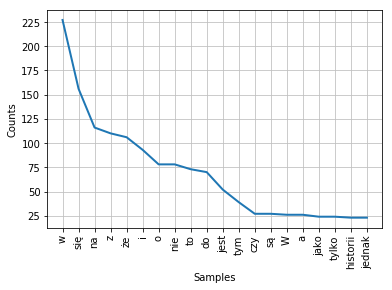

In [106]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
print(stopwords.words('russian'))

fdist = nltk.FreqDist(polish_tokenizer(p2))
most_common = nltk.FreqDist(dict(fdist.most_common(20)))
most_common.plot()

## normalizacja

### token normalization
* USA czy U.S.A. czy United States of America ?
* KRK - Kraków - Krakówek, Zakrz - Zakrzówek, UJ - ujot - Uniwersytet Jagielloński
* czarno-biały, czarnobiały, czarno biały

### usuwanie wielkich liter
* Kot leży na poduszce. Na poduszce leży kot. 

(**Ćwiczenie**) napisz program, który zmieni tekst na tekst napisany małymi literami. Czy potrafisz to zrobić w jednej linijce?

In [109]:
print("Kot leży na poduszce. Na poduszce leży kot".lower())
print(' '.join(word.lower() for word in "Rożne debilne rozwiązania".split()))

kot leży na poduszce. na poduszce leży kot
rożne debilne rozwiązania


(**Ćwiczenie**) Załóż, że kropka oznacza koniec zdania i napisz usuwanie wielkich liter tylko na początku zdań.


In [40]:
re.sub(r"(\. [\w]+)", lambda pat: pat.group(1).lower(), "Kot leży. Teraz z małej. Teraz też? Już nie")

'Kot leży. teraz z małej. teraz też? Już nie'

### usuwanie akcentów i "innych takich"
* cliché and cliche 
* naive and naïve


### Czasem będziemy chcieli zmieniać:
* 25.stycznia b.r., 10/12/19, 23. III, 15 b. m-ca, 27.09.1889 na &lt;DATA\>
* 123, 928 na &lt;LICZBA\> (ale 1410 znów na &lt;DATA\>!)
* itd.

In [107]:
from unidecode import unidecode as decode
print(decode(u'Málaga'))

Malaga
